# k-means 알고리즘으로 붓꽃 품종 구분하기

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
import pandas as pd

In [6]:
from sklearn.cluster import KMeans
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width'
                                                , 'petal_length', 'petal_width'])
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [7]:
KM = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
KM.fit(iris_df)

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [8]:
KM.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [11]:
iris_df['target'] = iris.target
iris_df['cluster'] = KM.labels_
iris_df.groupby(['target', 'cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64

# silhouette 계수 측정

In [13]:
from sklearn.metrics import silhouette_score, silhouette_samples
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
iris_df['silhouette_coeff']=score_samples
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,0.852582
1,4.9,3.0,1.4,0.2,0,1,0.814916
2,4.7,3.2,1.3,0.2,0,1,0.828797
3,4.6,3.1,1.5,0.2,0,1,0.804352
4,5.0,3.6,1.4,0.2,0,1,0.848918


In [14]:
silhouette_score(iris.data, iris_df['cluster'])

np.float64(0.5511916046195919)

# 실루엣 차트

In [15]:
import matplotlib.pyplot as plt

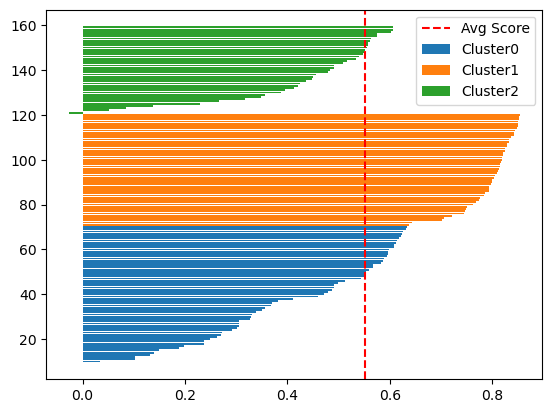

In [17]:
y_lower=10
for i in range(3):
  cluster_i = score_samples[iris_df['cluster']==i]
  cluster_i.sort()
  y_upper = y_lower + len(cluster_i)
  plt.barh(range(y_lower, y_upper), cluster_i, label=f'Cluster{i}')
  y_lower = y_upper

avg_score = silhouette_score(iris.data, iris_df['cluster'])
plt.axvline(avg_score, color='red', linestyle='--', label='Avg Score')
plt.legend()
plt.show()

# scree plot

In [18]:
KM.inertia_

78.85566582597728

In [19]:
scree_df = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:14

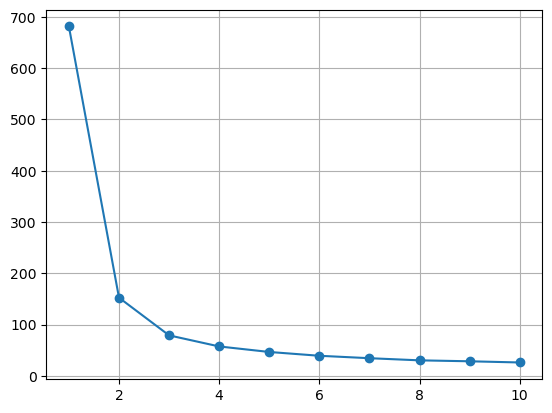

In [20]:
inertia = []
k_values = range(1,11)
for k in k_values:
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
  kmeans.fit(scree_df)
  inertia.append(kmeans.inertia_)
  
plt.plot(k_values, inertia, marker='o')
plt.grid()
plt.show()

# PCA > 2개의 주성분으로 축소

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed= pca.fit_transform(iris.data)
pca_transformed.shape

(150, 2)

In [23]:
iris_df['pca_x'] = pca_transformed[:, 0]
iris_df['pca_y'] = pca_transformed[:, 1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755


# PCA 결과 시각화

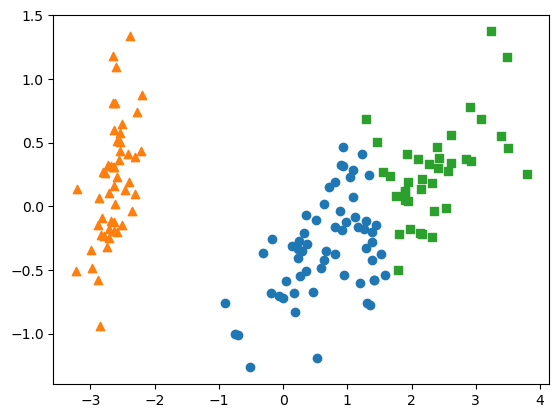

In [25]:
plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_x'], 
            y=iris_df.loc[iris_df['cluster']==0, 'pca_y'], marker='o')
plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_x'], 
            y=iris_df.loc[iris_df['cluster']==1, 'pca_y'], marker='^')
plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_x'], 
            y=iris_df.loc[iris_df['cluster']==2, 'pca_y'], marker='s')

plt.show()

# StandardScaler 로 스케일링
# PCA 2개로 축소
# 시각화

In [27]:
from sklearn.preprocessing import StandardScaler
iris_caled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])
iris_caled[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 , -1.22474487,
         0.18259934,  1.35832938, -1.30971087],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 , -1.22474487,
         0.18259934,  1.18857506, -1.32435711],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 , -1.22474487,
         0.18259934,  1.25113184, -1.40967409]])

In [28]:
from sklearn.decomposition import PCA
pca_scaled = PCA(n_components=2)
pca_transformed_scaled =  pca_scaled.fit_transform(iris_caled)
#주성분1, 주성분2
iris_df['pca_scaled_x'] = pca_transformed_scaled[:, 0]
iris_df['pca_scaled_y'] = pca_transformed_scaled[:, 1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff,pca_x,pca_y,pca_scaled_x,pca_scaled_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397,-3.152120,0.710720
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001,-2.970722,-0.083819
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949,-3.230879,0.139873
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299,-3.116799,-0.053567
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755,-3.245118,0.811202


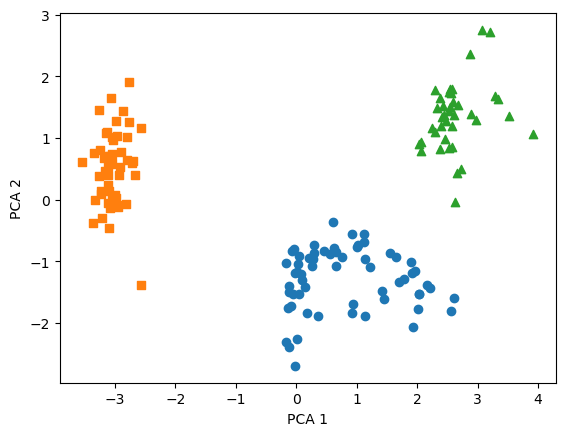

In [29]:
plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==0, 'pca_scaled_y'], marker='o')
plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==1, 'pca_scaled_y'], marker='s')
plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==2, 'pca_scaled_y'], marker='^')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [26]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [30]:
pca_scaled.explained_variance_ratio_

array([0.68099775, 0.19236841])

# 클러스터링 실습

In [36]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [ ]:
# pca 2개의 주성분